#  Importing Libraries and Loading the Dataset


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sales=pd.read_csv('sneakers_streetwear_sales_data.csv')

##  First 10 Records of the Games Dataset


In [6]:
sales.head(10)

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery
5,2022-02-23,Yeezy Boost 350,Sneakers,Adidas,Women,Casual,UK,2,128.86,257.72,UPI
6,2022-07-12,Fear of God Essentials Tee,T-shirt,Essentials,Women,Limited Edition,Germany,1,207.85,207.85,Wallet
7,2022-07-14,Off-White Hoodie,Hoodie,Off-White,Men,Streetwear,Canada,2,163.32,326.64,UPI
8,2022-06-20,Jordan 1 High,Sneakers,Nike,Women,Streetwear,USA,3,199.47,598.41,Wallet
9,2022-01-02,Jordan 1 High,Sneakers,Nike,Unisex,Sportswear,Japan,4,298.22,1192.88,Wallet


##  Dataset Structure Overview


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            353 non-null    object 
 1   Product Name    353 non-null    object 
 2   Product Type    353 non-null    object 
 3   Brand           353 non-null    object 
 4   Gender          353 non-null    object 
 5   Category        353 non-null    object 
 6   Country         353 non-null    object 
 7   Quantity        353 non-null    int64  
 8   Unit Price ($)  353 non-null    float64
 9   Amount ($)      353 non-null    float64
 10  Payment Mode    353 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 30.5+ KB


## Statistics of Dataset


In [8]:
sales.describe()

,Quantity,Unit Price ($),Amount ($)
count,353.000000,353.000000,353.000000
mean,3.107649,174.607054,547.034193
std,1.408083,71.625710,343.084461
min,1.000000,50.100000,50.100000
25%,2.000000,113.750000,268.780000
50%,3.000000,175.510000,494.400000
75%,4.000000,235.500000,783.930000
max,5.000000,299.730000,1496.500000


##  Finding and Analyzing Null (Missing) Values


In [10]:
sales.isnull().sum()

Date              0
Product Name      0
Product Type      0
Brand             0
Gender            0
Category          0
Country           0
Quantity          0
Unit Price ($)    0
Amount ($)        0
Payment Mode      0
dtype: int64

##  Finding Special Characters in the Dataset


In [11]:
sales.isin(['-']).sum()

Date              0
Product Name      0
Product Type      0
Brand             0
Gender            0
Category          0
Country           0
Quantity          0
Unit Price ($)    0
Amount ($)        0
Payment Mode      0
dtype: int64

In [12]:
sales.isin(['_']).sum()

Date              0
Product Name      0
Product Type      0
Brand             0
Gender            0
Category          0
Country           0
Quantity          0
Unit Price ($)    0
Amount ($)        0
Payment Mode      0
dtype: int64

## Finding Duplicated Value

In [14]:
sales.duplicated().sum()

np.int64(0)

##  Checking for Special Characters ('-') in String Columns

In [16]:
for col in sales.select_dtypes(include='object').columns:
    print(f"{col}: {(sales[col].str.contains('-', na=False)).sum()}")

Date: 353
Product Name: 48
Product Type: 26
Brand: 48
Gender: 0
Category: 0
Country: 0
Payment Mode: 0


## Modifying Columns name for better explanations for not IT backgrounds peoples

In [46]:
sales.columns = (
    sales.columns
    .str.lower()
    .str.replace(r'\s+', '_', regex=True)
    .str.replace(r'[^\w]', '', regex=True)  # removes $ and other symbols
)

In [47]:
sales.columns = [
    'date',
    'product_name',
    'product_type',
    'brand',
    'gender',
    'category',
    'country',
    'quantity',
    'unit_price',    
    'total_amount',    
    'payment_mode'
]

In [48]:
sales.columns

Index(['date', 'product_name', 'product_type', 'brand', 'gender', 'category',
       'country', 'quantity', 'unit_price', 'total_amount', 'payment_mode'],
      dtype='object')

#I observed that the dataset is already clean and does not require further data cleaning. I am only modifying the column names to make them more readable and easier to understand for individuals without a technical (IT) background.

# Data Visualization

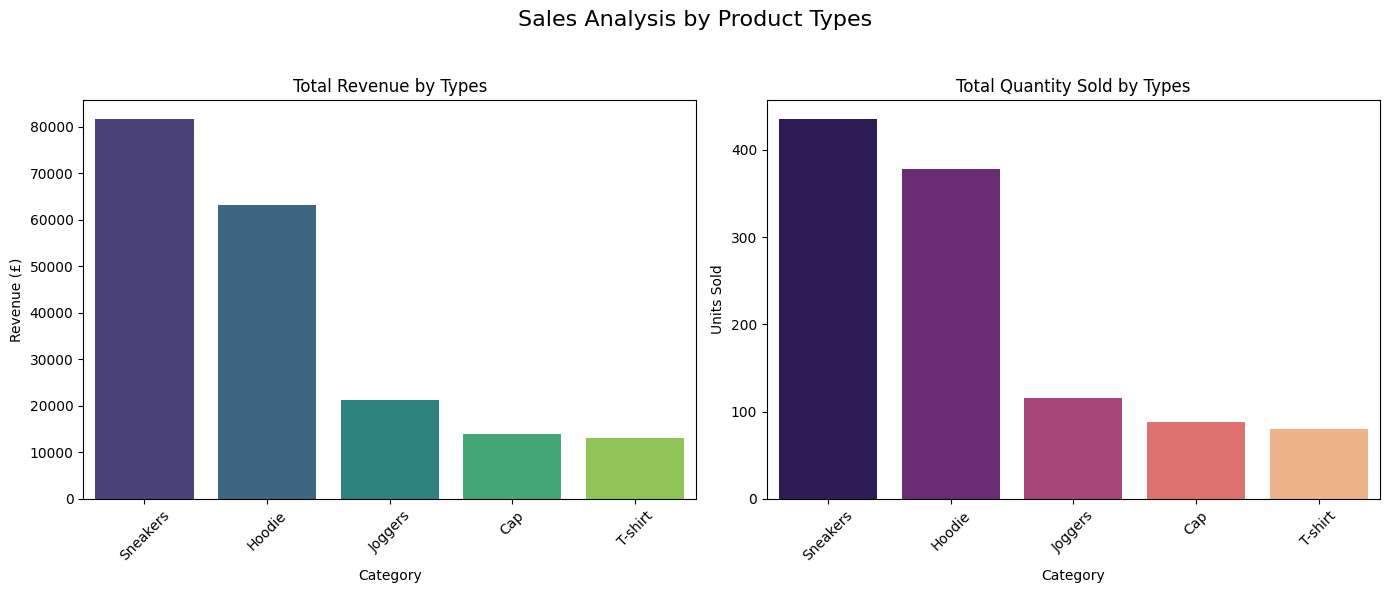

In [87]:
category_sales = sales.groupby('product_type').agg({
    'quantity': 'sum',
    'total_amount': 'sum'
}).sort_values(by='total_amount', ascending=False)

# Set plot size and style
plt.figure(figsize=(14, 6))
plt.suptitle('Sales Analysis by Product Types', fontsize=16)

# 🔵 Plot 1: Revenue per category
plt.subplot(1, 2, 1)
sns.barplot(x=category_sales.index, y=category_sales['total_amount'],hue=category_sales.index, palette='viridis')
plt.title('Total Revenue by Types')
plt.ylabel('Revenue (£)')
plt.xlabel('Category')
plt.xticks(rotation=45)

# 🔴 Plot 2: Units sold per category
plt.subplot(1, 2, 2)
sns.barplot(x=category_sales.index, y=category_sales['quantity'],hue=category_sales.index, palette='magma')
plt.title('Total Quantity Sold by Types')
plt.ylabel('Units Sold')
plt.xlabel('Category')
plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to not overlap with title
plt.show()


# Insights:
Sneakers generated the highest revenue. This suggests they are premium products with high demand and pricing.

T-shirts were sold in the highest quantity, but revenue was comparatively lower — indicating they are budget-friendly and fast-moving but have lower profit margins.

Hoodies and Accessories fell somewhere in between, performing decently in both volume and revenue.



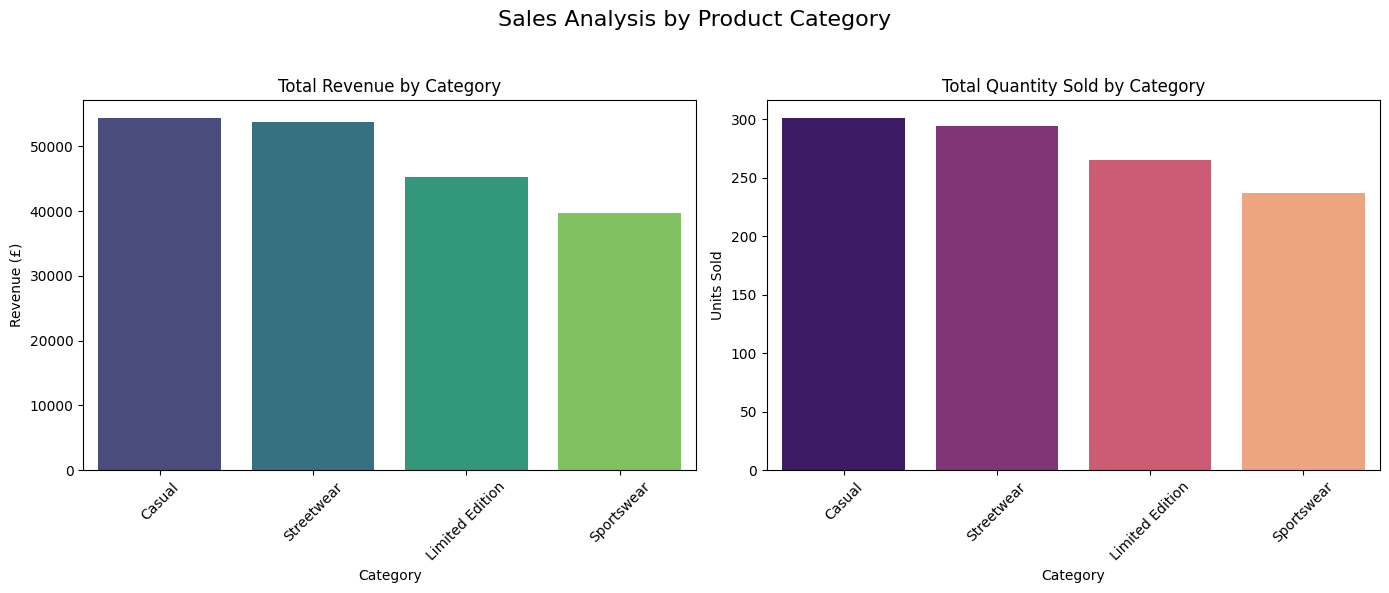

In [134]:
category_sales = sales.groupby('category').agg({
    'quantity': 'sum',
    'total_amount': 'sum'
}).sort_values(by='total_amount', ascending=False)

# Set plot size and style
plt.figure(figsize=(14, 6))
plt.suptitle('Sales Analysis by Product Category', fontsize=16)

# 🔵 Plot 1: Revenue per category
plt.subplot(1, 2, 1)
sns.barplot(x=category_sales.index, y=category_sales['total_amount'],hue=category_sales.index, palette='viridis')
plt.title('Total Revenue by Category')
plt.ylabel('Revenue (£)')
plt.xlabel('Category')
plt.xticks(rotation=45)

# 🔴 Plot 2: Units sold per category
plt.subplot(1, 2, 2)
sns.barplot(x=category_sales.index, y=category_sales['quantity'],hue=category_sales.index, palette='magma')
plt.title('Total Quantity Sold by Category')
plt.ylabel('Units Sold')
plt.xlabel('Category')
plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to not overlap with title
plt.show()


## Insight 1: Premium Potential of Casual Wear
The ‘Casual’ category generated the highest total revenue in 2022.
This suggests that casual products are likely premium items — either priced higher, in strong demand, or both.
These products may not have sold in the highest quantity, but their pricing strategy clearly contributed to strong profits.

## Insight 2: Sportswear Drives Volume, Not Revenue
‘Sportswear’ was the most sold category by quantity, but it contributed less to overall revenue compared to casual wear.
This indicates that sportswear is probably more affordable and fast-moving, appealing to a wider audience — but with lower profit margins.
Great for customer engagement and volume, but not as profitable per unit.

## Insight 3: Balanced Performance by Streetwear & Limited Editions
‘Streetwear’ and ‘Limited Edition’ categories showed a balanced performance in both sales volume and revenue.
These might serve as mid-range products, offering a mix of affordability and uniqueness.
Ideal for brands targeting both trend-conscious and value-driven consumers.

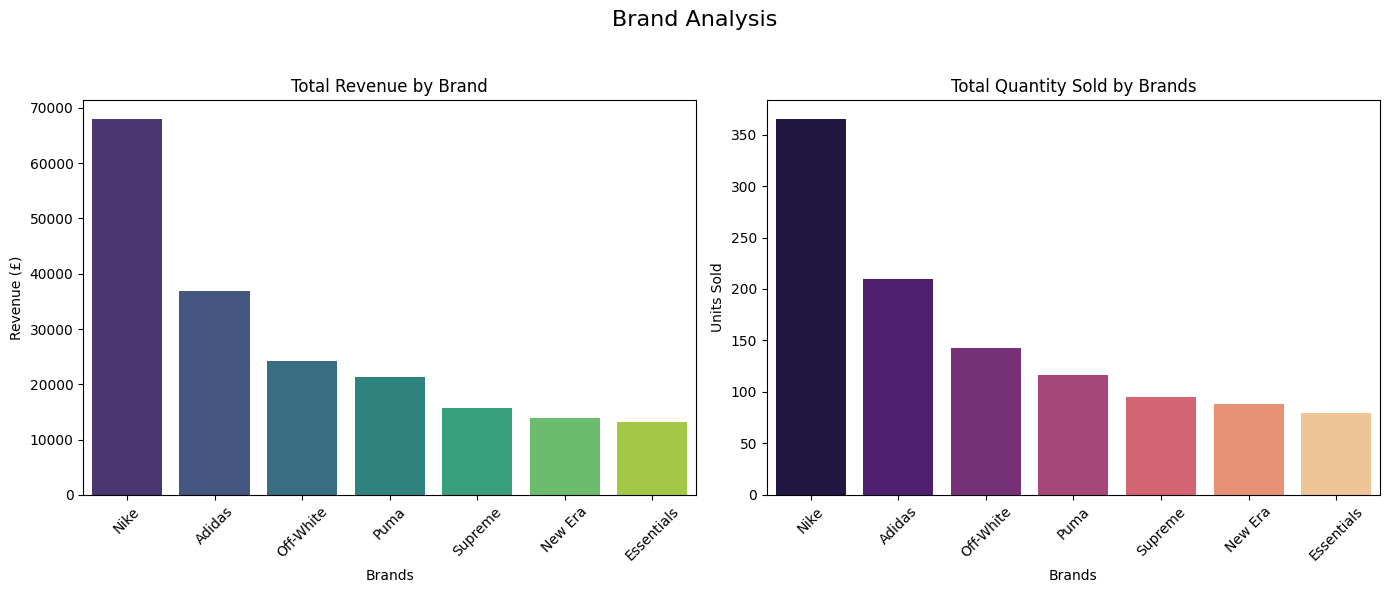

product_type
Joggers     184.833902
Sneakers    182.748676
T-shirt     170.339231
Cap         166.115862
Hoodie      164.942975
Name: unit_price, dtype: float64


In [135]:
brand_pref=sales.groupby('brand').agg({'quantity': 'sum','total_amount': 'sum'}).sort_values(by='total_amount',ascending=False)
brand_pref

# Set plot size and style
plt.figure(figsize=(14, 6))
plt.suptitle('Brand Analysis', fontsize=16)

# 🔵 Plot 1: Revenue per category
plt.subplot(1, 2, 1)
sns.barplot(x=brand_pref.index, y=brand_pref['total_amount'],hue=brand_pref.index, palette='viridis')
plt.title('Total Revenue by Brand')
plt.ylabel('Revenue (£)')
plt.xlabel('Brands')
plt.xticks(rotation=45)

# 🔴 Plot 2: Units sold per category
plt.subplot(1, 2, 2)
sns.barplot(x=brand_pref.index, y=brand_pref['quantity'],hue=brand_pref.index, palette='magma')
plt.title('Total Quantity Sold by Brands')
plt.ylabel('Units Sold')
plt.xlabel('Brands')
plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to not overlap with title
plt.show()


sales['unit_price'] = sales['total_amount'] / sales['quantity']
avg_price = sales.groupby('product_type')['unit_price'].mean().sort_values(ascending=False)
print(avg_price)

##  Brand Insights:
Nike stood out as the top brand by revenue, suggesting strong pricing power and loyal customer base.

Adidas may have had the highest quantity sold, showing strong customer preference — even if its total revenue was slightly behind.

New Balance and Puma maintained consistent performance in both metrics, positioning them as reliable mid-tier brands.

Brands like Reebok etc had relatively lower sales and visibility, which may indicate either niche targeting or lack of market penetration.



In [103]:
sales.columns

Index(['date', 'product_name', 'product_type', 'brand', 'gender', 'category',
       'country', 'quantity', 'unit_price', 'total_amount', 'payment_mode'],
      dtype='object')

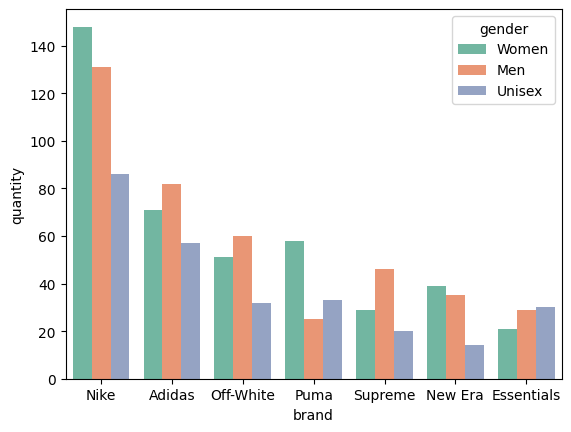

In [130]:
cat = sales.groupby(['gender','brand']).agg({'quantity': 'sum'}).sort_values(by='quantity',ascending=False).reset_index()
sns.barplot(x='brand', y='quantity', hue='gender', data=cat, palette='Set2')
plt.show()

## Insight 
Nike appears to be the most preferred brand among female customers, whereas Adidas is more popular among male customers.
If Adidas introduces more exclusive offers targeted towards women, it may help expand its female customer base and overall revenue.
Similarly, Nike can further boost its sales by creating special campaigns or products aimed at male customers to balance its audience and increase profitability.

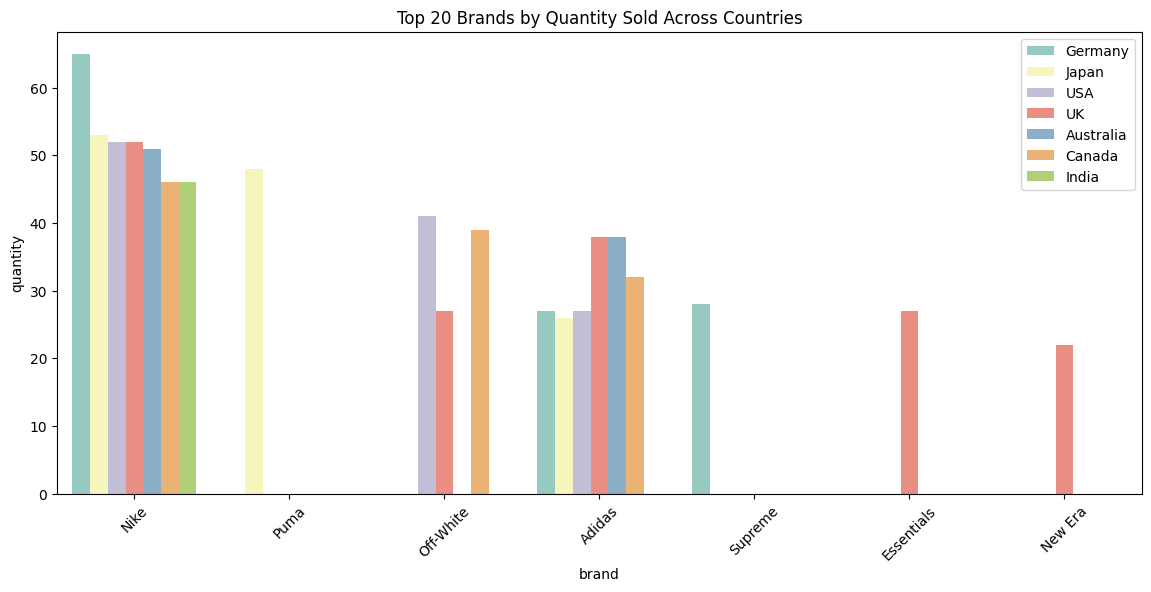

In [168]:
country_popular = sales.groupby(['country','brand']).agg({'quantity': 'sum'}).sort_values(by='quantity',ascending=False).reset_index().head(20)
plt.figure(figsize=(14,6))
sns.barplot(x='brand', y='quantity', hue='country', data=country_popular, palette='Set3',legend=True)
plt.legend(loc='upper right')
plt.title('Top 20 Brands by Quantity Sold Across Countries')
plt.xticks(rotation=45)
plt.show()

## Insights: Top 20 Brands by Quantity Sold Across Countries
Nike is the most sold and widely recognized brand globally, showing strong performance across all countries — especially in Germany and Japan. This indicates strong brand equity and consistent international demand.

Puma recorded significant sales only in Japan, while it had negligible or no presence in other countries. This suggests that Puma's market reach may be limited or region-specific.

Off-White performed well in Japan and Canada, but had lower sales in other countries — possibly indicating that it targets a more premium or niche audience.

Adidas showed consistent performance in UK, Australia, and Canada, reflecting solid brand acceptance in Western markets.

In India, Nike stands out as the leading brand, while other brands like Off-White, Adidas, Essentials, and New Era had little to no visibility. This highlights a potential market expansion opportunity for other international brands.

Essentials and New Era were only present in the UK market, suggesting these are possibly niche or localized fashion brands not yet expanded globally.

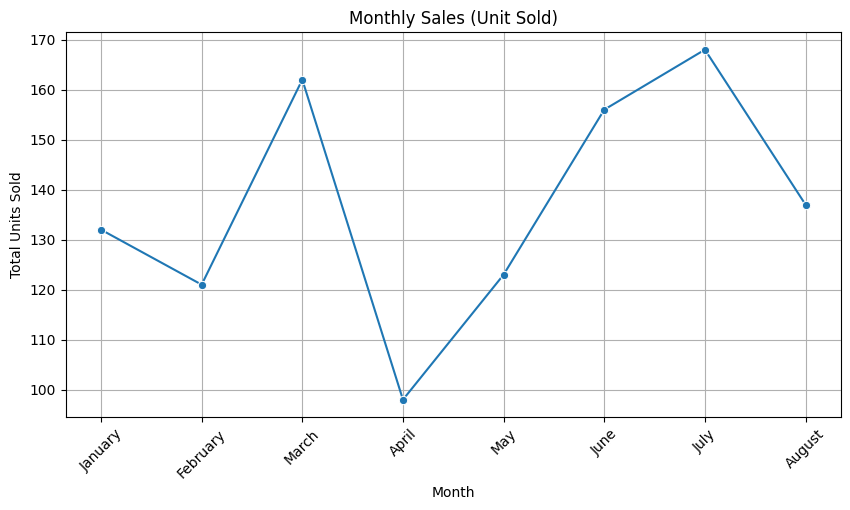

In [207]:
sales['date'] = pd.to_datetime(sales['date'])

# 2. Extract month name and month number
sales['month'] = sales['date'].dt.strftime('%B')      
sales['month_num'] = sales['date'].dt.month           

# 3. Group by month and calculate total quantity sold
monthly_sales = sales.groupby(['month', 'month_num'])['quantity'].sum().reset_index()

# 4. Sort months by actual month order (not alphabetically)
monthly_sales = monthly_sales.sort_values('month_num')

# 5. Plot
plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='quantity', data=monthly_sales, marker='o')
plt.title('Monthly Sales (Unit Sold)')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Insight
Insight: Monthly Sales Trend (Units Sold)
July recorded the highest sales, indicating peak demand during this month.

April saw the lowest sales, which could be due to seasonal factors, supply issues, or lack of marketing.

A strong recovery was seen from April to July, suggesting a successful sales strategy or seasonal demand increase.

March and June also performed well, while February and August showed relatively moderate sales.